In [4]:
!pip install dataanalysts

# **Regular Format**

In [5]:
import pandas as pd

# Load dataset
df = pd.read_excel("/content/ecommerce_sales_data.xlsx")

# Check dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_ID       1000 non-null   object        
 1   Purchase_Date     1000 non-null   datetime64[ns]
 2   Product_Category  1000 non-null   object        
 3   Purchase_Amount   1000 non-null   float64       
 4   Customer_Age      1000 non-null   int64         
 5   Location          1000 non-null   object        
 6   Gender            1000 non-null   object        
 7   Total_Purchases   1000 non-null   int64         
 8   Discount_Applied  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 70.4+ KB


**1. Handling Missing Values**

In [12]:
# Filling missing values with median for numerical columns
df["Purchase_Amount"] = df["Purchase_Amount"].fillna(df["Purchase_Amount"].median())
df["Customer_Age"] = df["Customer_Age"].fillna(df["Customer_Age"].median())

# Filling missing values with mode for categorical columns
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Location"] = df["Location"].fillna(df["Location"].mode()[0])

print(df)

                              Customer_ID Purchase_Date Product_Category  \
0    9bd5903d-5f17-4072-adf2-7f155a86b79f    2023-11-19           Sports   
1    6810dc95-53af-40e0-a7cd-a6e43adcbbd2    2023-02-24         Clothing   
2    491c5e10-a077-4032-aa69-38b90b64ff18    2023-11-03           Beauty   
3    50d2977c-c438-4584-ae73-6b130f884c01    2024-10-29   Home & Kitchen   
4    201cf635-b2c7-4735-b13c-b4d7c57dd331    2024-12-30      Electronics   
..                                    ...           ...              ...   
995  1b0ec21b-9687-4de4-b97b-cade611e9272    2024-12-13            Books   
996  ef328cb2-579d-4078-b454-000d2d2e30d1    2024-04-29      Electronics   
997  fb2ced32-2c33-463f-a438-e939e601b1ab    2024-07-12         Clothing   
998  05b6d5ac-70ed-4de9-812c-156b41a09129    2024-09-26   Home & Kitchen   
999  5a8edbe1-1b8a-4979-aef7-f0d4e500d1d3    2024-09-05           Sports   

     Purchase_Amount  Customer_Age            Location Gender  \
0             349.15  

**2. Removing Duplicates**

In [14]:
df.drop_duplicates(inplace=True)

**3. Fixing Data Types**

In [17]:
df["Purchase_Date"] = pd.to_datetime(df["Purchase_Date"])
df["Purchase_Amount"] = df["Purchase_Amount"].astype(float)
df["Customer_Age"] = df["Customer_Age"].astype(int)

**4. Data Visualization**

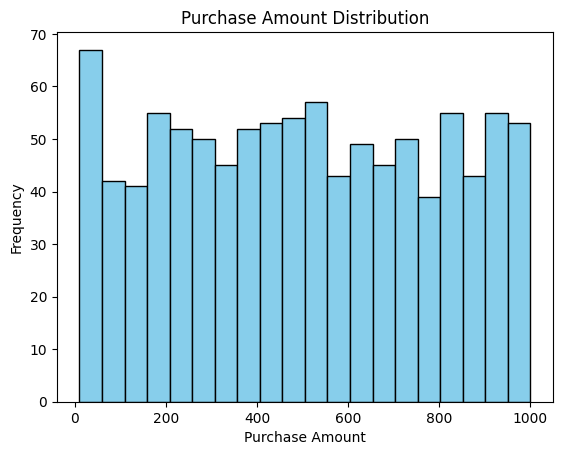

In [21]:
import matplotlib.pyplot as plt

plt.hist(df["Purchase_Amount"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.title("Purchase Amount Distribution")
plt.show()

# **dataanalysts library format**

In [7]:
import dataanalysts as da

# Load dataset using DataAnalysts
df = da.excel("/content/ecommerce_sales_data.xlsx")

# Quick summary of dataset
da.summary(df)

✅ Excel file '/content/ecommerce_sales_data.xlsx' loaded successfully from sheet '0'.


,Column,Data Type,Non-Null Count,Unique Values,Min,Max,Mean,Median,Top,Frequency
0,Customer_ID,object,1000,1000,NaN,NaN,NaN,NaN,0001dba9-a19c-4ac8-b768-e1437cbcb0e0,1.0
1,Purchase_Date,datetime64[ns],1000,550,NaN,NaN,NaN,NaN,None,NaN
2,Product_Category,object,1000,7,NaN,NaN,NaN,NaN,Sports,156.0
3,Purchase_Amount,float64,1000,992,10.25,999.96,499.54912,498.085,None,NaN
4,Customer_Age,int64,1000,57,18.00,74.00,46.54600,47.000,None,NaN
5,Location,object,1000,961,NaN,NaN,NaN,NaN,West Michael,4.0
6,Gender,object,1000,2,NaN,NaN,NaN,NaN,M,517.0
7,Total_Purchases,int64,1000,49,1.00,49.00,24.56000,24.000,None,NaN
8,Discount_Applied,float64,1000,911,0.00,49.98,25.17913,26.050,None,NaN


**1. Handling Missing Values**

In [13]:
df = da.clean(df, strategy="handle_missing", missing_strategy="median")
print(df)

Filled missing values using mean strategy.
                              Customer_ID Purchase_Date Product_Category  \
0    9bd5903d-5f17-4072-adf2-7f155a86b79f    2023-11-19           Sports   
1    6810dc95-53af-40e0-a7cd-a6e43adcbbd2    2023-02-24         Clothing   
2    491c5e10-a077-4032-aa69-38b90b64ff18    2023-11-03           Beauty   
3    50d2977c-c438-4584-ae73-6b130f884c01    2024-10-29   Home & Kitchen   
4    201cf635-b2c7-4735-b13c-b4d7c57dd331    2024-12-30      Electronics   
..                                    ...           ...              ...   
995  1b0ec21b-9687-4de4-b97b-cade611e9272    2024-12-13            Books   
996  ef328cb2-579d-4078-b454-000d2d2e30d1    2024-04-29      Electronics   
997  fb2ced32-2c33-463f-a438-e939e601b1ab    2024-07-12         Clothing   
998  05b6d5ac-70ed-4de9-812c-156b41a09129    2024-09-26   Home & Kitchen   
999  5a8edbe1-1b8a-4979-aef7-f0d4e500d1d3    2024-09-05           Sports   

     Purchase_Amount  Customer_Age          

**2. Removing Duplicates**

In [15]:
df = da.clean(df, strategy="remove_duplicates")

Removed 0 duplicate rows.


**3. Fixing Data Types**

In [20]:
df = da.clean(df, strategy="convert_dtype", column="Purchase_Amount", dtype="float")
df = da.clean(df, strategy="convert_dtype", column="Customer_Age", dtype="int")

Converted column Purchase_Amount to data type float.
Converted column Customer_Age to data type int.


**4. Data Visualization**

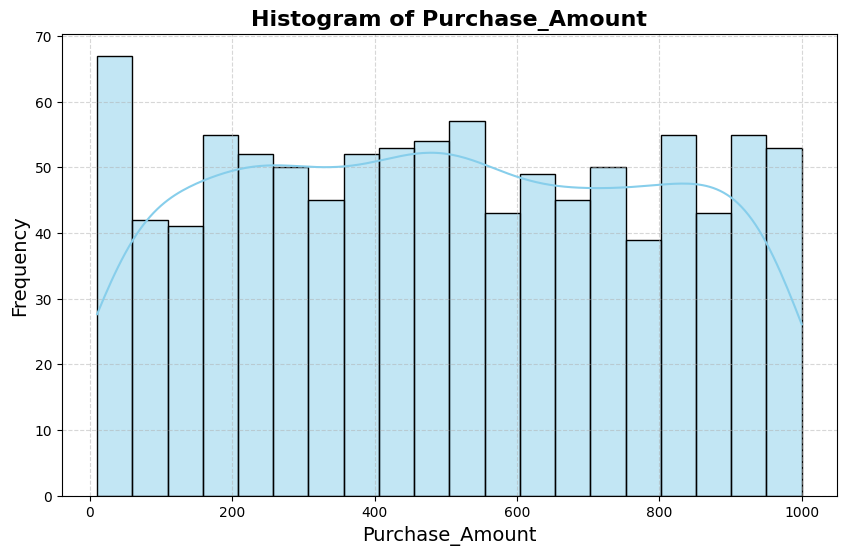

In [22]:
da.histogram(df, column="Purchase_Amount", bins=20)